# 다차원 텐서 (다차원 배열)

In [1]:
import numpy as np

### 다차원 배열의 계산 복습


In [7]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[7,8,9],
              [10,11,12]])

add_result = A + B

vec = np.array([1,2,3])
add_result2 = A+ vec    # 브로드캐스트

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


# 다차원 배열의 계산으로 순전파 구현

In [67]:
# 입력 데이터
X = np.random.randn(4,5) # 4개의 샘플, 5차원 Feature
X.shape
# 가중치
W = np.random.randn(5,3) # 5차원 Feature, 3개의 뉴런

# 편향
b = np.random.randn(1,3) 

z = np.dot(X,W) +b

result = np.maximum(0,z)
print(result)

[[0.         0.         0.        ]
 [0.         1.35222056 0.68253667]
 [0.55006934 0.         0.        ]
 [7.87810354 1.19923264 0.01682473]]


### 다층 퍼셉트론

In [77]:
X = np.random.randn(6,10)

# 은닉층 : 10개의 입력 => 8개의 뉴런
w1 = np.random.randn(10,8)
b1 = np.random.randn(1,8)

# 출력층 : 8 개의 입력 -> 4개의 클래스
w2 = np.random.randn(8,4)
b2 = np.random.randn(1,4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X,w1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1,w2) + b2
exp_z2 = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)

result1, result2


(array([[-0.99565109, -0.06064699, -0.99999721,  0.98032478, -0.93387986,
          0.99981286,  0.08447521, -0.99994981],
        [ 0.93828962, -0.99999916,  0.87849295, -0.99998548,  0.66668053,
         -0.9999341 ,  0.95196872, -0.13506317],
        [-0.99267214, -0.99989218, -0.9994997 , -0.8691297 , -0.29581376,
          0.34916573, -0.85748282, -0.99630456],
        [-0.27790778, -0.99978544,  0.94262941,  0.40035246,  0.38559267,
         -0.99999994, -0.99984131,  0.49996126],
        [-0.99971544,  0.8951523 ,  0.97027091, -0.16900104,  0.25644403,
         -0.99975614, -0.99731853,  0.83298276],
        [-0.99984109,  0.91125972, -0.7712176 , -0.31308594, -0.3017678 ,
         -0.96322881, -0.99820177,  0.96918615]]),
 array([[0.00353176, 0.91082388, 0.00139965, 0.0842447 ],
        [0.00983195, 0.03418425, 0.09779834, 0.85818545],
        [0.00554956, 0.62393071, 0.00309108, 0.36742866],
        [0.03018781, 0.01106508, 0.16958437, 0.78916273],
        [0.40522143, 0.00952

### 이미지 데이터 예시

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


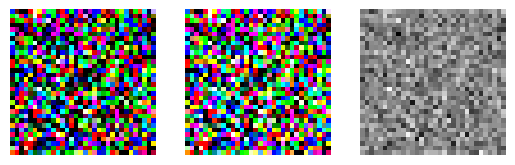

In [101]:
import matplotlib.pyplot as plt
batch_size = 5
channels = 3
height = 32
width = 32

images = np.random.randn(batch_size, channels, height, width)

# PyTorch 프레임워크에서는 이미지 데이터를 (채널,높이,너비) 순서로 저장
# Matplotlib.pyplot.imshow() 함수는 (높이,너비,채널) 순서로 이미지를 표시
# 따라서 transpose() 함수를 이용해 축의 순서를 재배열

bright_images = np.clip(images+0.2,0,1)
gray_images = np.mean(images,axis=1)

images_for_display = images[0].transpose(1,2,0)
bright_images_for_display = bright_images[0].transpose(1,2,0)


plt.subplot(1,3,1)
plt.imshow(images_for_display)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(bright_images_for_display)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(gray_images[0],cmap='gray')
plt.axis('off')
plt.show()